In [26]:
import os
import random
for name in os.listdir('../resources'):
  print(name)

slup2.png
ruiny-szare2.png
asfalt0.png
drzewo4.png
opona0.png
trawa0.png
player
kamien1.png
drzewo2.png
drzewo3.png
kamien0.png
ruiny-braz2.png
bg.png
kamien2.png
kable1.png
kable2.png
gruz-braz1.png
ruiny-szare3.png
gruz-braz2.png
slup0.png
gruz-szary1.png
drzewo1.png
ruiny-braz4.png
czaszka1.png
chwast0.png
gruz-braz0.png
drzewo0.png
gruz-szary0.png
ruiny-braz1.png
opona1.png
ruiny-szare1.png
slup1.png
ziemia0.png
ruiny-szare0.png
czaszka2.png
kable0.png
kilof.png
czaszka0.png
world
world-material
kosc0.png
ruiny-braz3.png
kosc1.png
ruiny-braz0.png


In [11]:
ALL = [
"slup2.png",
"ruiny-szare2.png",
"asfalt0.png",
"drzewo4.png",
"opona0.png",
"trawa0.png",
"player",
"kamien1.png",
"drzewo2.png",
"drzewo3.png",
"kamien0.png",
"ruiny-braz2.png",
"bg.png",
"kamien2.png",
"kable1.png",
"kable2.png",
"gruz-braz1.png",
"ruiny-szare3.png",
"gruz-braz2.png",
"slup0.png",
"gruz-szary1.png",
"drzewo1.png",
"ruiny-braz4.png",
"czaszka1.png",
"chwast0.png",
"gruz-braz0.png",
"drzewo0.png",
"gruz-szary0.png",
"ruiny-braz1.png",
"opona1.png",
"ruiny-szare1.png",
"slup1.png",
"ziemia0.png",
"ruiny-szare0.png",
"czaszka2.png",
"kable0.png",
"kilof.png",
"czaszka0.png",
"world",
"world-material",
"kosc0.png",
"ruiny-braz3.png",
"kosc1.png",
"ruiny-braz0.png"]

In [161]:
import numpy as np

def debug_print(world):
  for i in range(world.shape[0]):
    for j in range(world.shape[1]):
      print(world[i,j], end=" ")
    print()

CHUNK_SZ = 16

WALKABLE = [
  "opona0.png",
  "trawa0.png",
  "chwast0.png",
  "opona1.png",
  "czaszka2.png",
  "czaszka1.png",
  "czaszka0.png",
  "kosc0.png",
  "kosc1.png",
]

def gen(w, h):
  world = np.full((w, h), "ziemia0.png", dtype=np.chararray)
  add_walkables(world, w * h // 7)
  # add_path(world, 0, 0, w - 1, h - 1)

  for _ in range(int((w * h) ** 0.2)):
    add_grass_spot(world, random.randint(0, w - 1), random.randint(0, h - 1))
  # add_grass_spot(world, 1, 1)
    
  return world

def add_grass_spot(world, x, y):
  w, h = world.shape
  for i in range(x - 6, x + 6):
    for j in range(y - 6, y + 6):
        if i < 0 or i >= w or j < 0 or j >= h:
          continue
        if random.random() < 0.3:
          world[i, j] = "trawa0.png"
          
def add_path(world, x0, y0, x1, y1):
  w, h = world.shape
  x0 = min(max(x0, 0), w - 1)
  y0 = min(max(y0, 0), h - 1)
  x1 = min(max(x1, 0), w - 1)
  y1 = min(max(y1, 0), h - 1)
  while x0 < x1 or y0 < y1:
    world[x0, y0] = "asfalt0.png"
    way = np.random.randint(0,2)
    if way == 0 and x0 < x1:
      x0 += 1
    elif y0 < y1:
      y0 += 1


def add_walkables(world, n):
  w, h = world.shape
  for i in range(n):
    x = np.random.randint(0, w)
    y = np.random.randint(0, h)
    world[x, y] = np.random.choice(WALKABLE)

gen(10, 10)
None

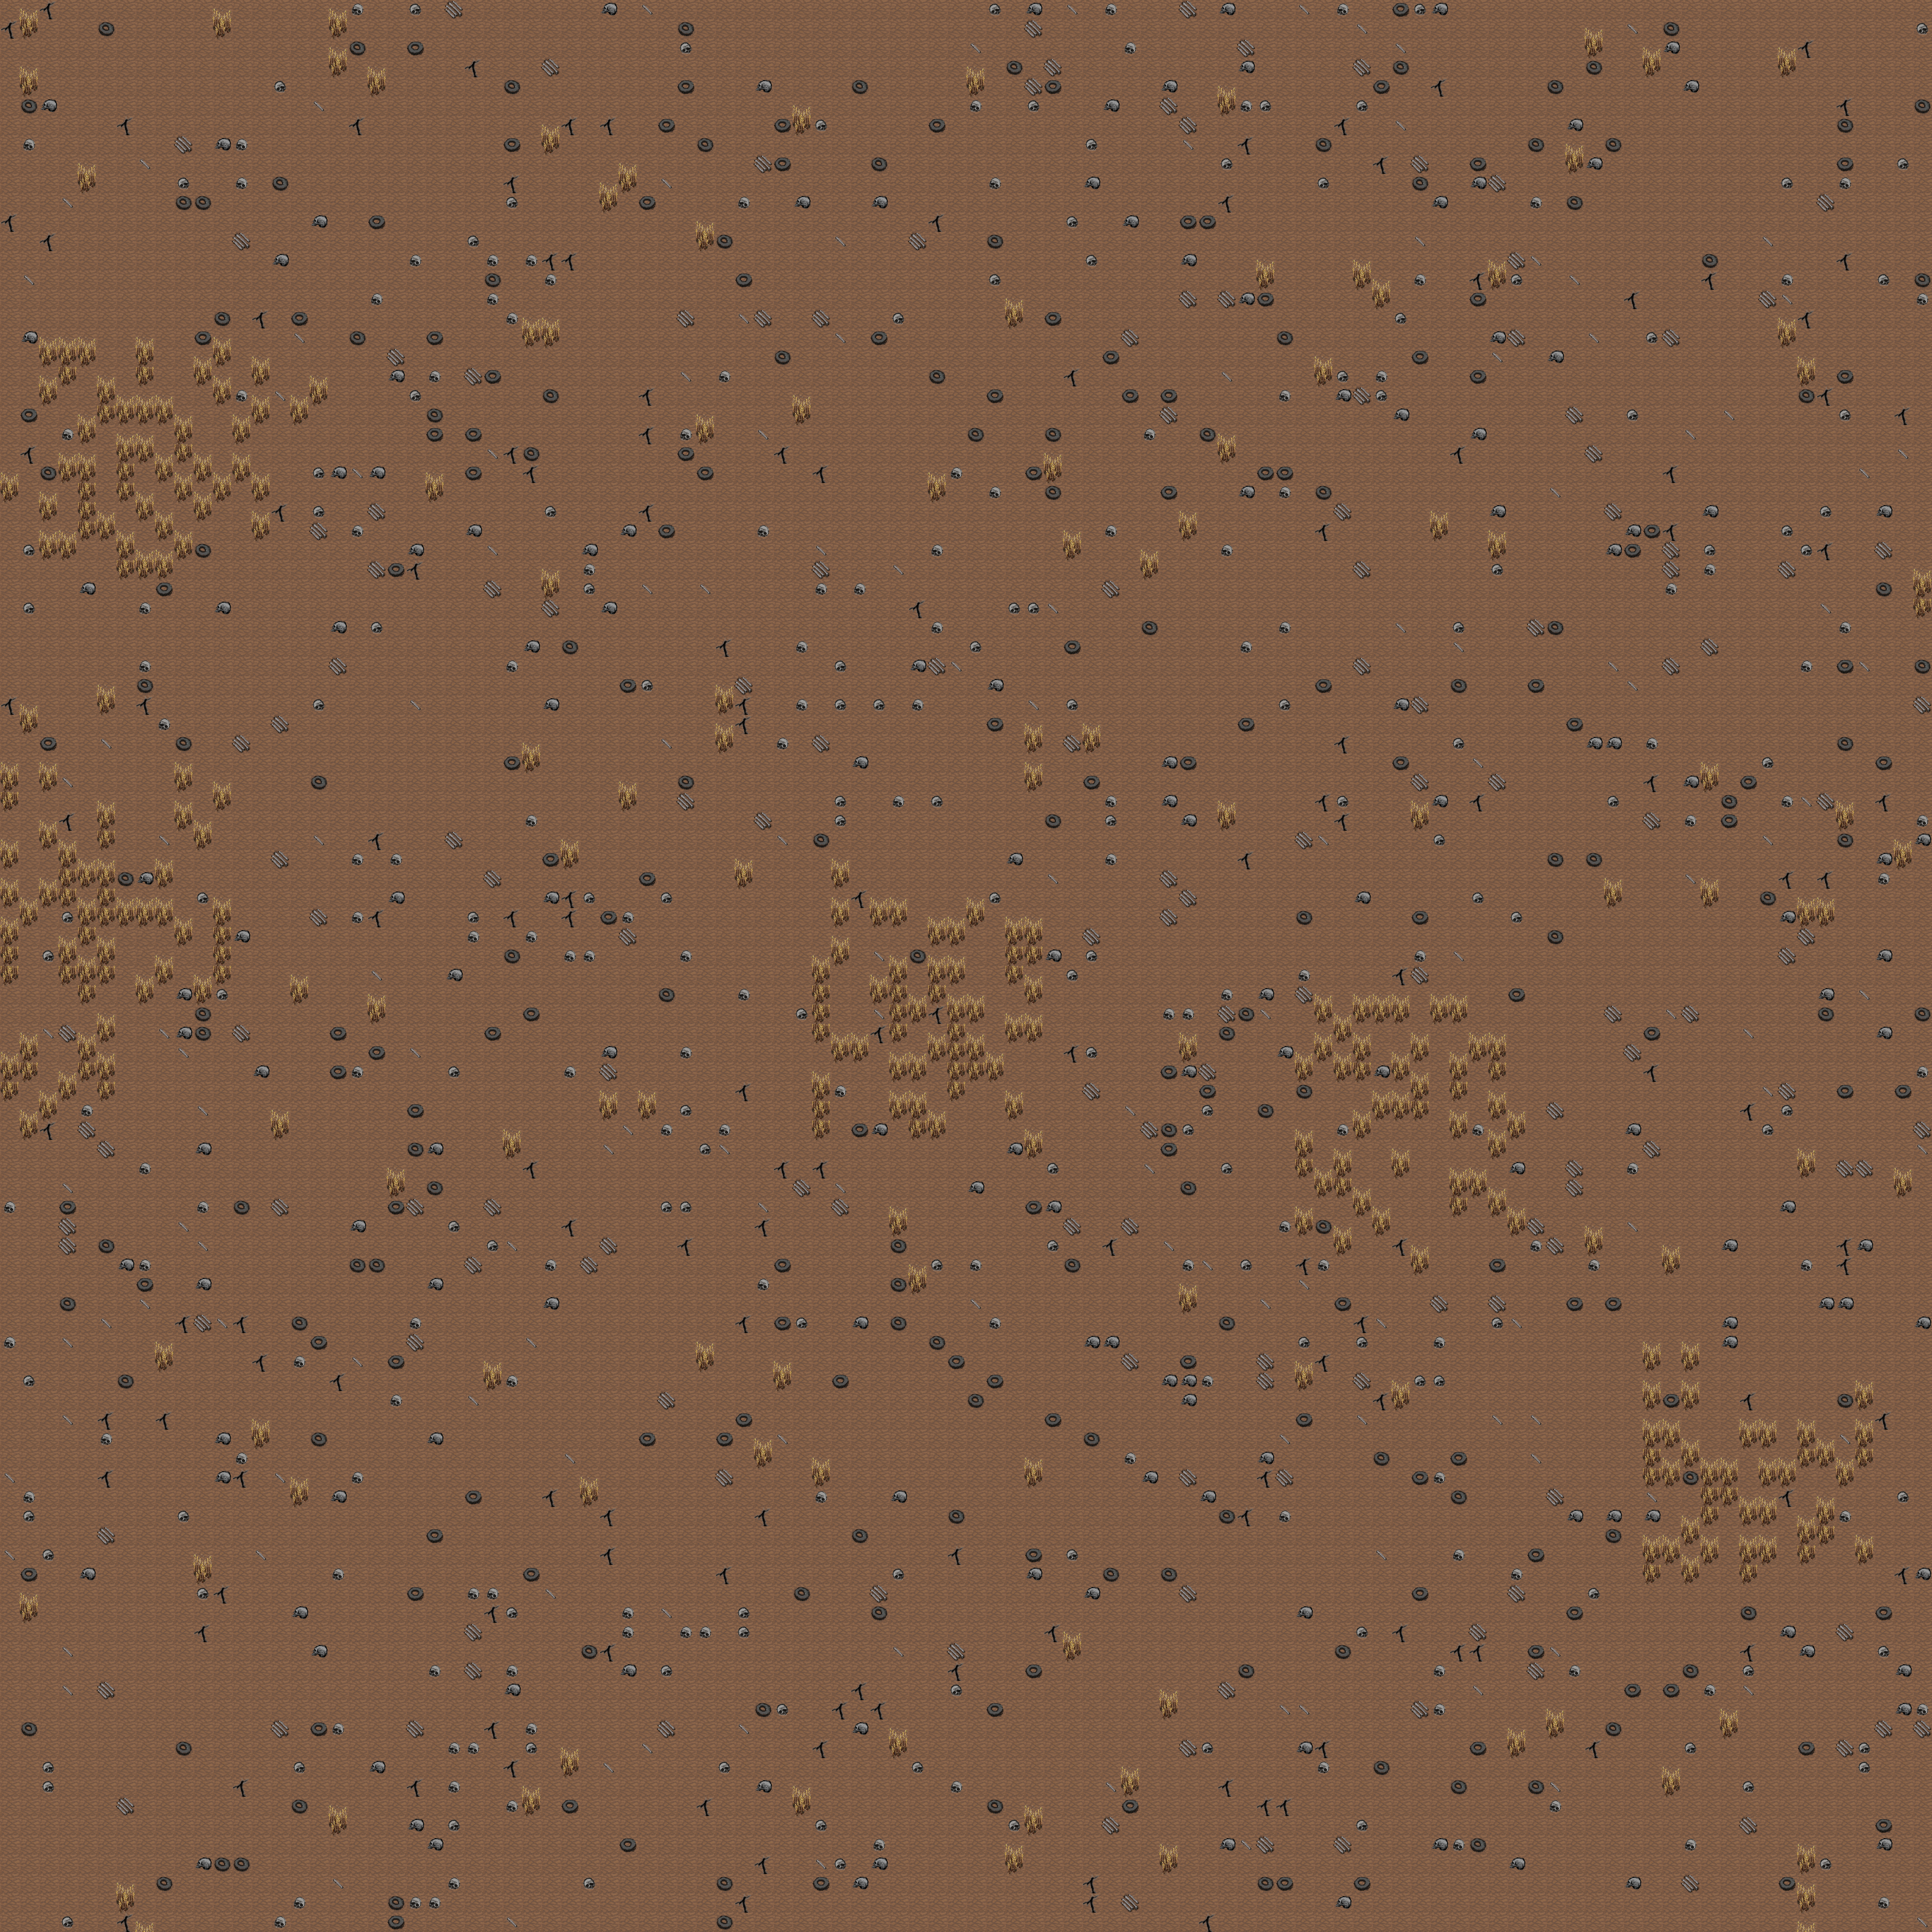

In [163]:
from PIL import Image

LOAD_CACHE = {}

def gen_image(world):
  w, h = world.shape
  img = Image.new('RGBA', (w * 64, h * 64))

  for i in range(w):
    for j in range(h - 1, -1, -1):
      if f"../resources/ziemia0.png" not in LOAD_CACHE:
        LOAD_CACHE["../resources/ziemia0.png"] = Image.open(f"../resources/ziemia0.png")
      img.paste(LOAD_CACHE["../resources/ziemia0.png"], (i * 64, j * 64))  

  for i in range(w):
    for j in range(h - 1, -1, -1):
      if f"../resources/{world[i,j]}" not in LOAD_CACHE:
        LOAD_CACHE[f"../resources/{world[i,j]}"] = Image.open(f"../resources/{world[i,j]}")
      sprite = LOAD_CACHE[f"../resources/{world[i,j]}"]
      img.paste(sprite, (i * 64, j * 64), sprite)
  return img

gen_image(gen(100, 100))